📊 YouTube 댓글 분석 시작
📂 데이터 로드 중...
✅ 댓글 789개 로드 완료
✅ 영상 10개 로드 완료


☁️  워드클라우드 생성 중...


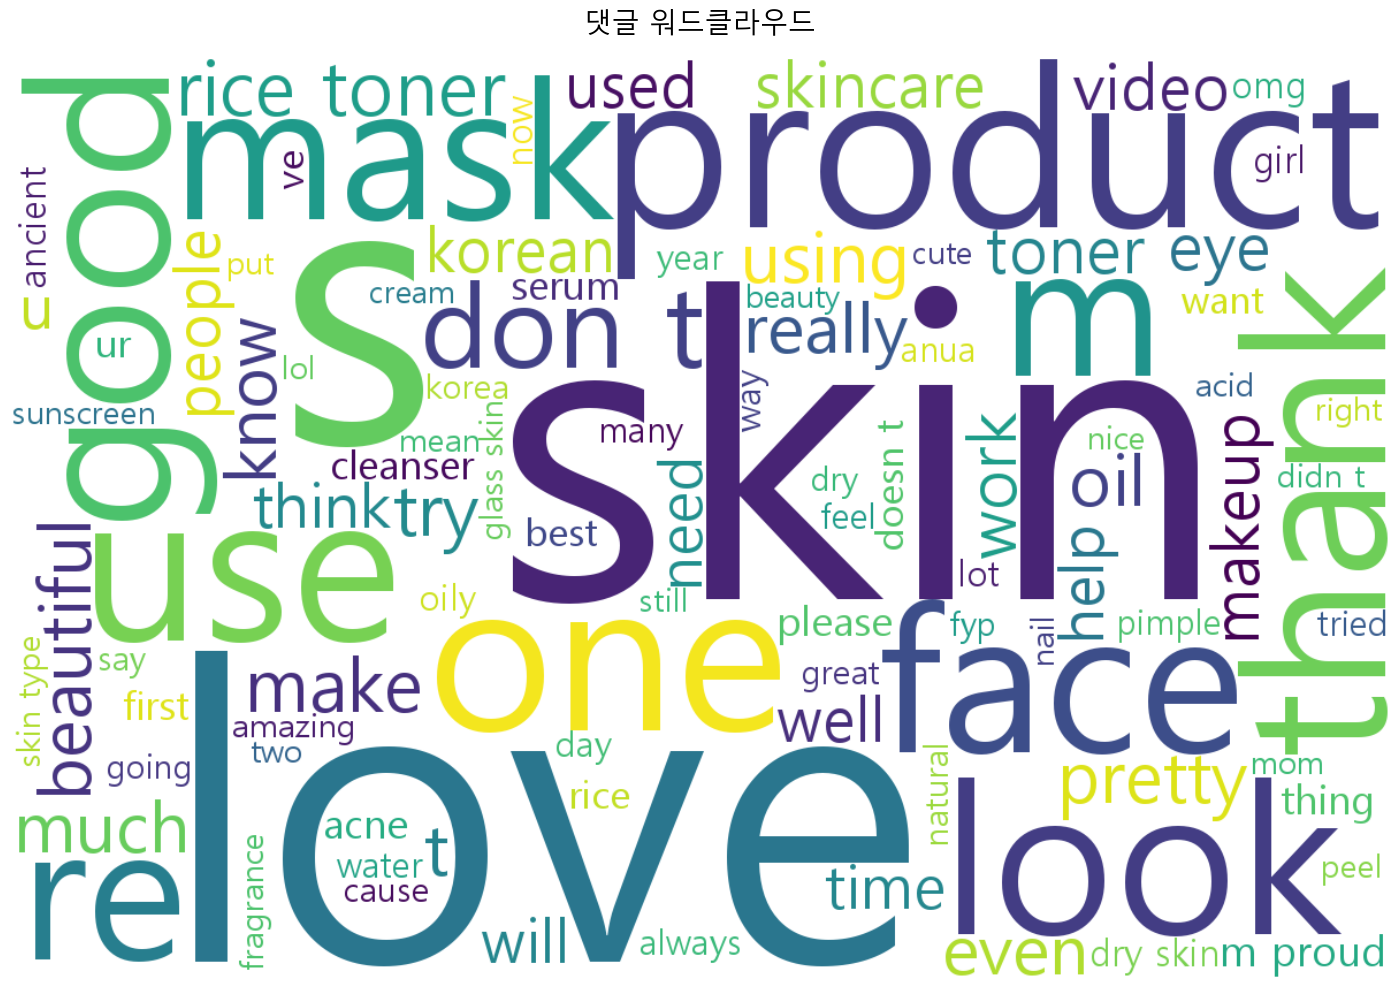

✅ 워드클라우드 저장: wordcloud.png


📊 상위 20개 키워드 빈도 분석 중...


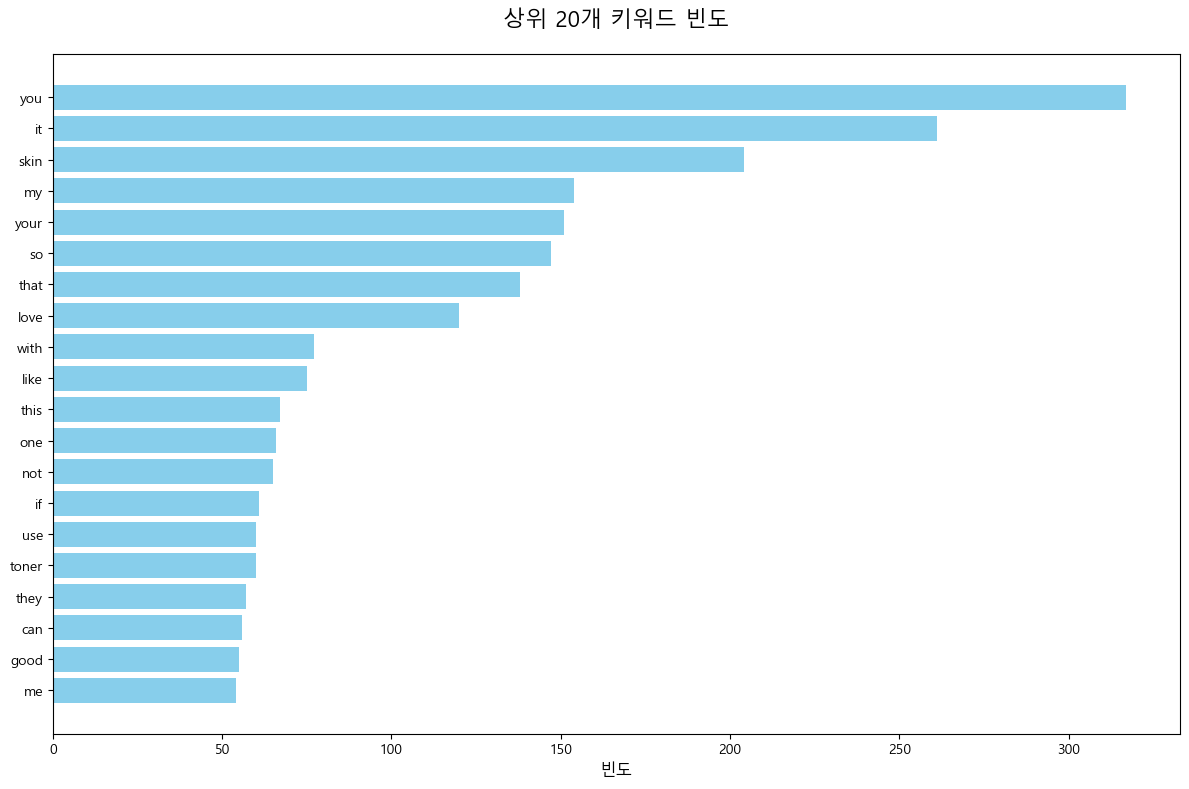

✅ 키워드 빈도 그래프 저장: keyword_frequency.png
✅ 키워드 빈도 데이터 저장: keyword_frequency.csv


😊😢 감성 키워드 분석 중...


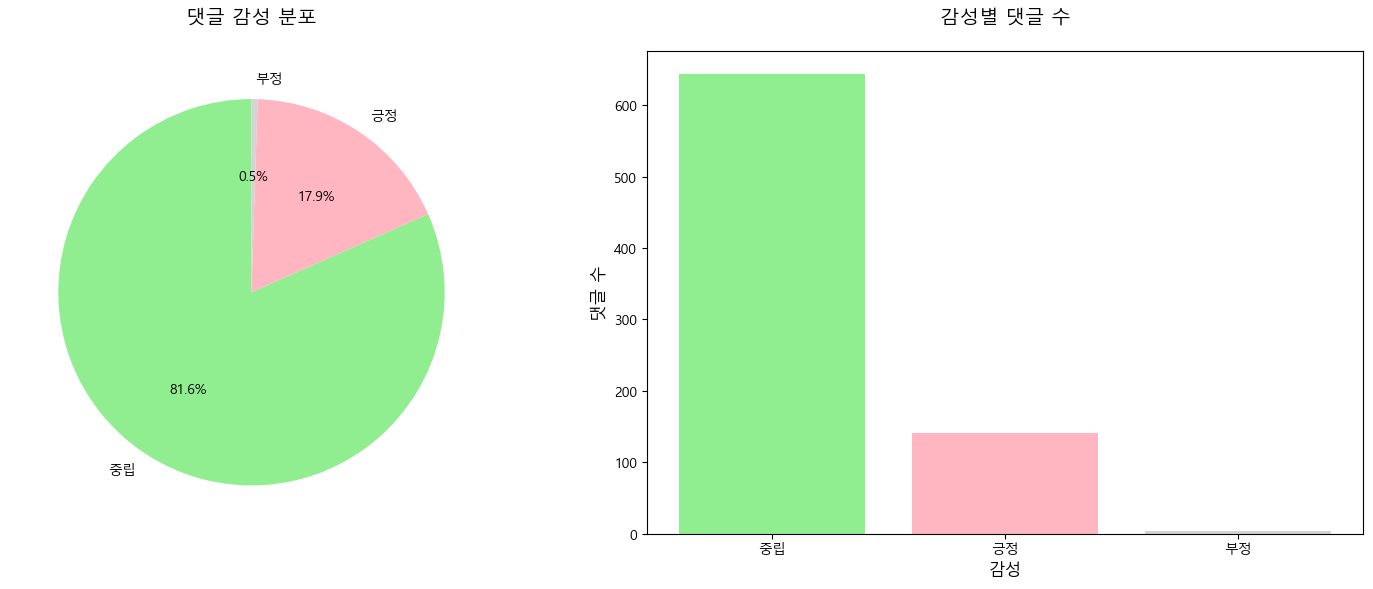

✅ 감성 분석 그래프 저장: sentiment_keywords.png
✅ 감성 분석 데이터 저장: sentiment_analysis.csv

📊 감성 분포:
sentiment
중립    644
긍정    141
부정      4
Name: count, dtype: int64


📈 시간대별 트렌드 분석 중 (간격: D)...


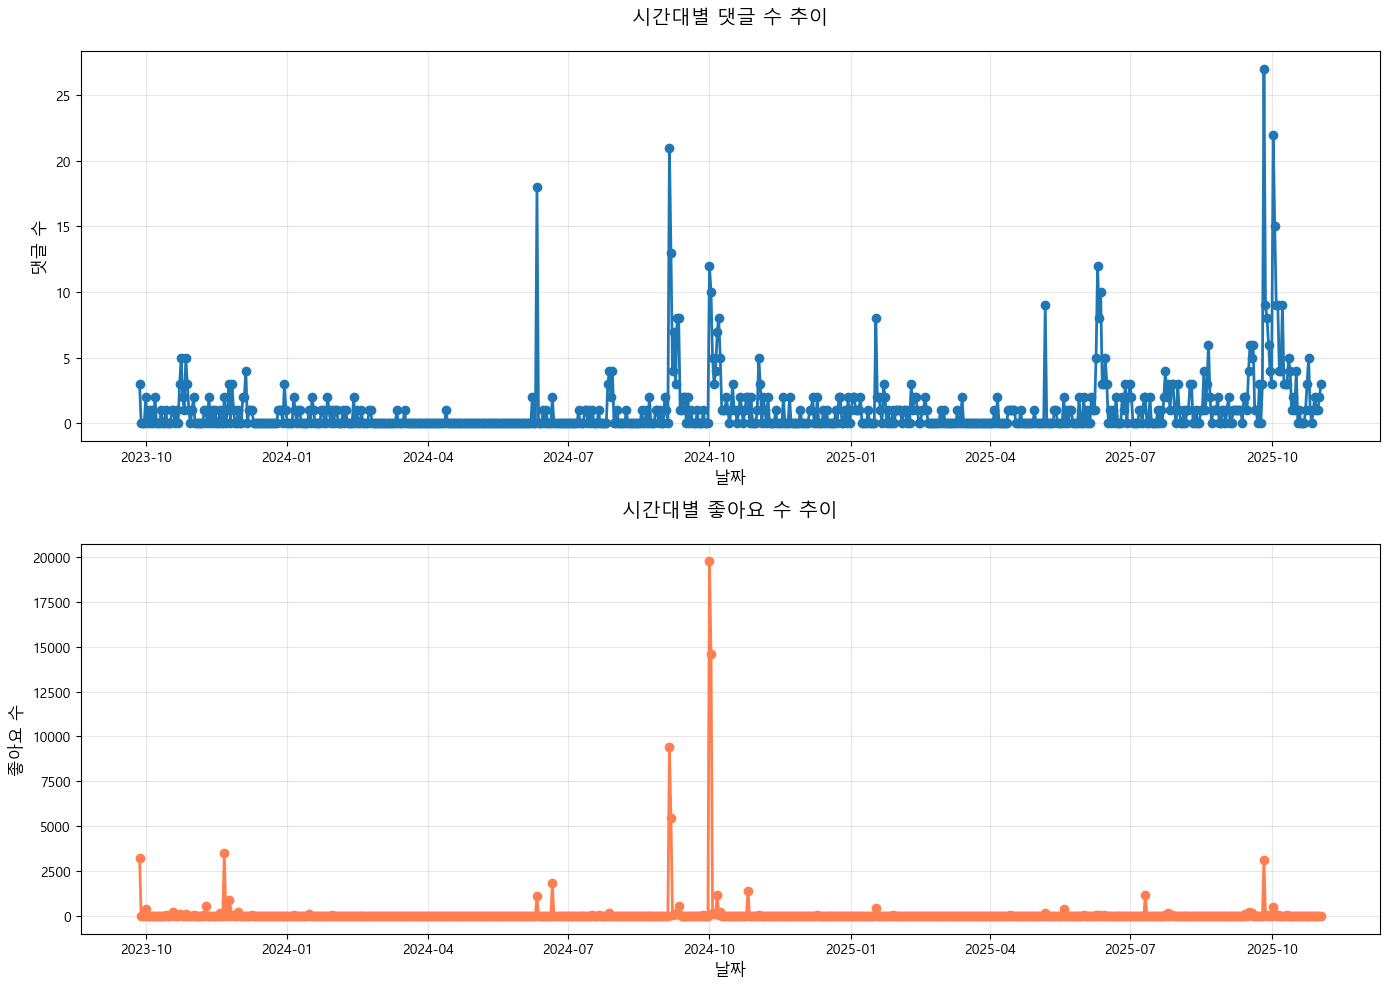

✅ 시간 트렌드 그래프 저장: time_trend.png
✅ 시간 트렌드 데이터 저장: time_trend.csv


🔗 상위 15개 키워드 동시출현 분석 중...


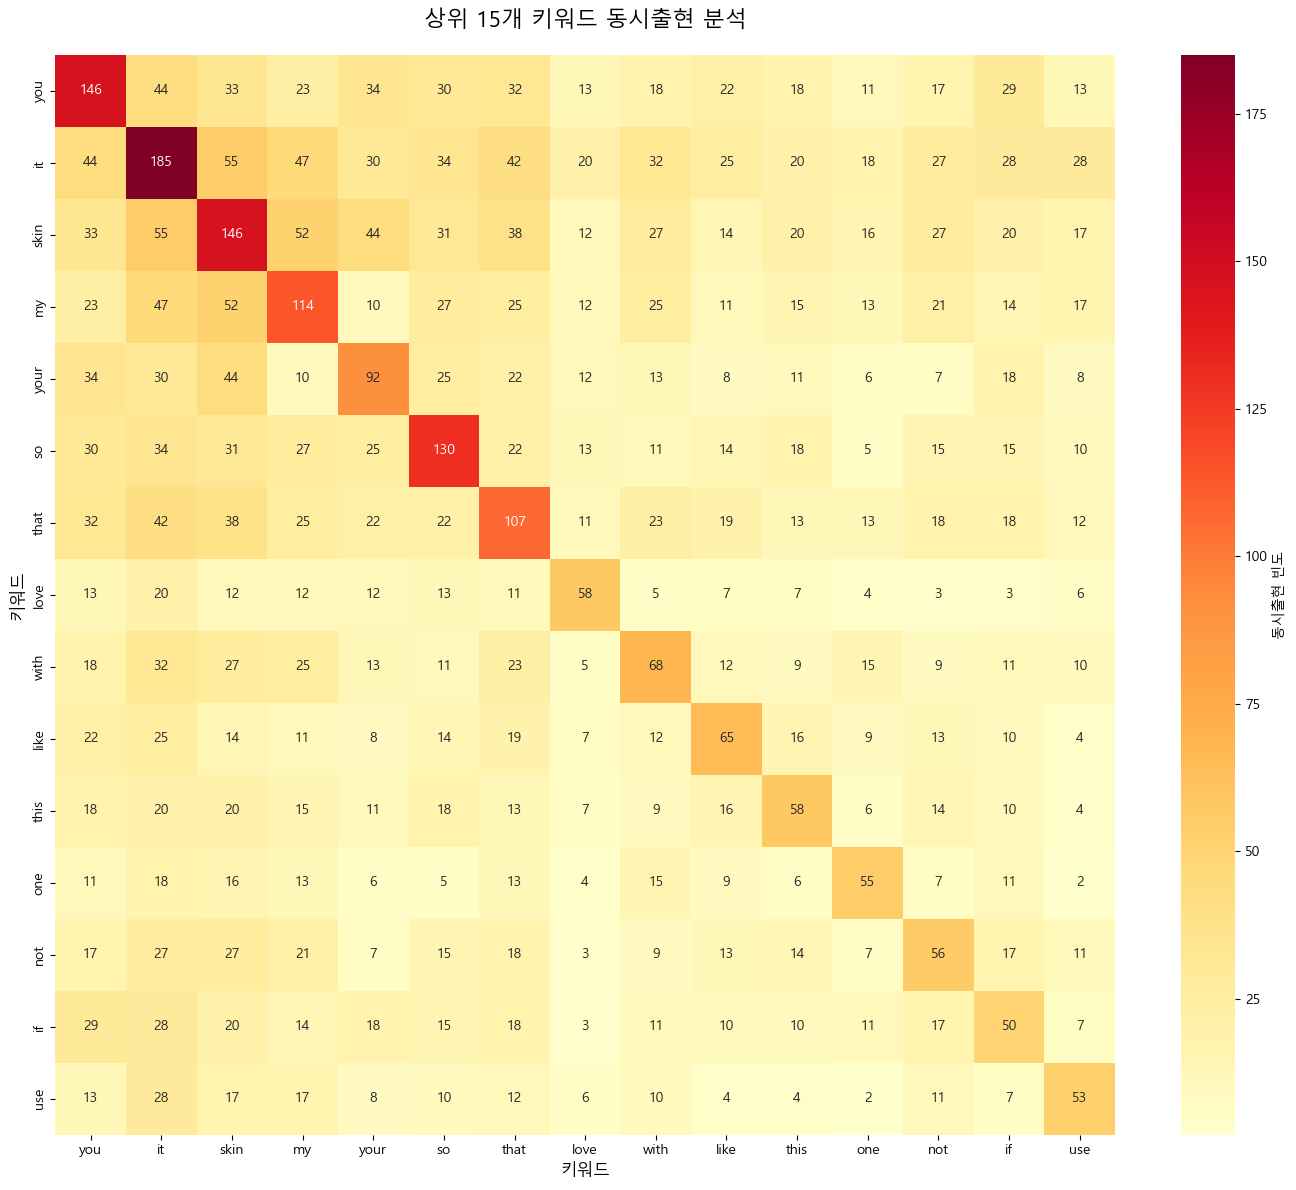

✅ 동시출현 히트맵 저장: cooccurrence.png
✅ 동시출현 매트릭스 저장: cooccurrence_matrix.csv


🎬 영상별 토픽 비교 분석 중...


C:\Users\Admin\AppData\Local\Temp\ipykernel_28888\3788183370.py:393: UserWarning: Glyph 127872 (\N{RIBBON}) missing from font(s) Malgun Gothic.
  plt.savefig(save_path, dpi=300, bbox_inches='tight')
C:\Users\Admin\AppData\Local\Temp\ipykernel_28888\3788183370.py:393: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) Malgun Gothic.
  plt.savefig(save_path, dpi=300, bbox_inches='tight')
C:\Users\Admin\AppData\Local\Temp\ipykernel_28888\3788183370.py:393: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from font(s) Malgun Gothic.
  plt.savefig(save_path, dpi=300, bbox_inches='tight')
c:\Users\Admin\miniconda3\envs\gpt_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127872 (\N{RIBBON}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\envs\gpt_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) Malgun Gothic.
  fig.canvas.print_fig

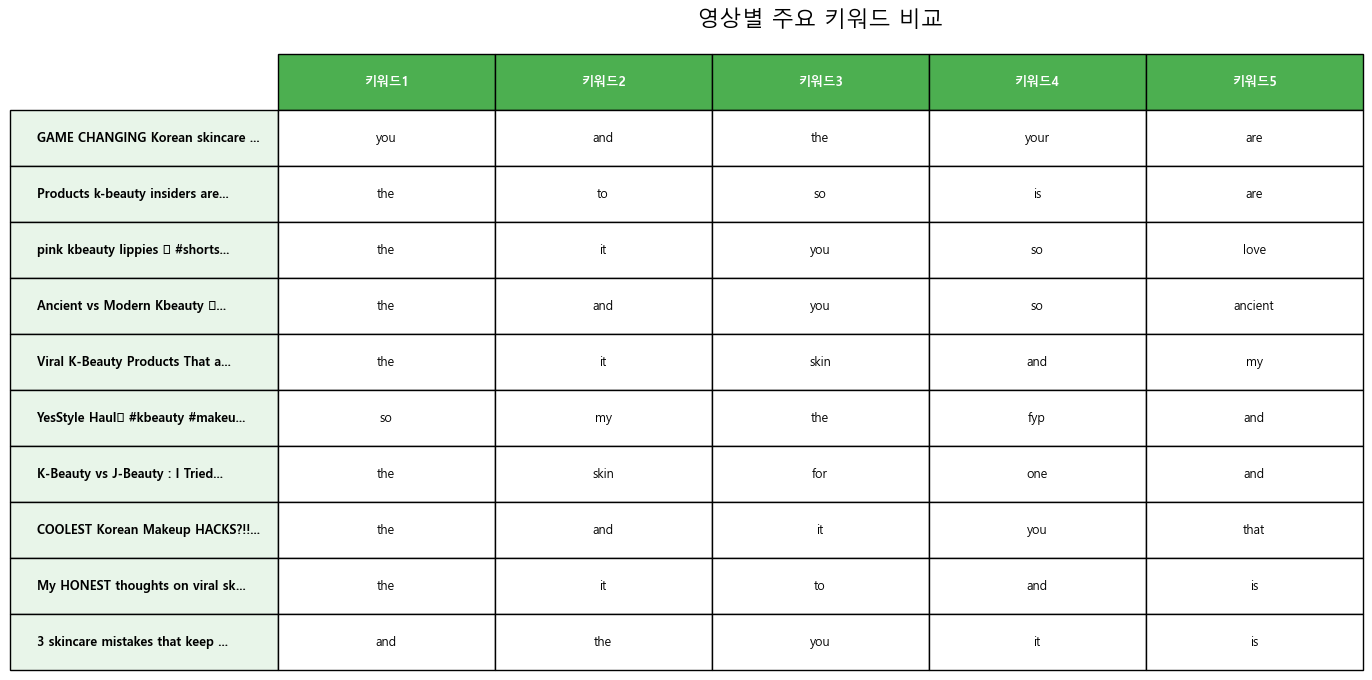

✅ 토픽 비교 그래프 저장: topic_comparison.png
✅ 토픽 비교 데이터 저장: topic_comparison.csv

🎉 모든 분석 완료!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import re
from wordcloud import WordCloud
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac
plt.rcParams['axes.unicode_minus'] = False


class YouTubeCommentAnalyzer:
    """YouTube 댓글 분석 클래스"""
    
    def __init__(self, comments_csv, videos_csv=None):
        """
        Args:
            comments_csv (str): 댓글 CSV 파일 경로
            videos_csv (str): 영상 CSV 파일 경로 (선택)
        """
        print("📂 데이터 로드 중...")
        self.comments_df = pd.read_csv(comments_csv)
        self.videos_df = pd.read_csv(videos_csv) if videos_csv else None
        
        # 날짜 컬럼 변환
        if 'published_at' in self.comments_df.columns:
            self.comments_df['published_at'] = pd.to_datetime(self.comments_df['published_at'])
        
        print(f"✅ 댓글 {len(self.comments_df)}개 로드 완료")
        if self.videos_df is not None:
            print(f"✅ 영상 {len(self.videos_df)}개 로드 완료")
    
    
    def preprocess_text(self, text):
        """텍스트 전처리"""
        if pd.isna(text):
            return ""
        
        # 소문자 변환
        text = str(text).lower()
        
        # URL 제거
        text = re.sub(r'http\S+|www\S+', '', text)
        
        # 특수문자 제거 (한글, 영문, 숫자, 공백만 남김)
        text = re.sub(r'[^가-힣a-z0-9\s]', ' ', text)
        
        # 연속된 공백 제거
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    
    
    def extract_keywords(self, min_length=2, top_n=50):
        """키워드 추출 (단어 빈도 기반)"""
        all_text = ' '.join(self.comments_df['text'].apply(self.preprocess_text))
        words = all_text.split()
        
        # 최소 길이 이상인 단어만 필터링
        words = [w for w in words if len(w) >= min_length]
        
        # 불용어 제거 (기본 리스트)
        stopwords = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for',
                    'of', 'is', 'are', 'was', 'were', 'been', 'be', 'have', 'has', 'had',
                    '그', '이', '저', '것', '수', '등', '들', '및', '또한', '하다', '있다', '되다',
                    '이것', '그것', '저것', '그런', '이런', '저런'}
        
        words = [w for w in words if w not in stopwords]
        
        # 빈도 계산
        word_freq = Counter(words)
        
        return word_freq.most_common(top_n)
    
    
    def wordcloud(self, save_path='wordcloud.png', width=1200, height=800):
        """
        워드클라우드 생성
        
        Args:
            save_path (str): 저장 경로
            width (int): 이미지 너비
            height (int): 이미지 높이
        """
        print("\n☁️  워드클라우드 생성 중...")
        
        # 텍스트 전처리
        all_text = ' '.join(self.comments_df['text'].apply(self.preprocess_text))
        
        # 워드클라우드 생성
        wordcloud = WordCloud(
            font_path='malgun.ttf',  # Windows 한글 폰트
            # font_path='/System/Library/Fonts/AppleGothic.ttf',  # Mac 한글 폰트
            width=width,
            height=height,
            background_color='white',
            max_words=100,
            relative_scaling=0.3,
            colormap='viridis'
        ).generate(all_text)
        
        # 시각화
        plt.figure(figsize=(15, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('댓글 워드클라우드', fontsize=20, pad=20)
        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"✅ 워드클라우드 저장: {save_path}")
    
    
    def keyword_frequency(self, top_n=20, save_path='keyword_frequency.png'):
        """
        키워드 빈도 분석 (막대그래프)
        
        Args:
            top_n (int): 상위 N개 키워드
            save_path (str): 저장 경로
        """
        print(f"\n📊 상위 {top_n}개 키워드 빈도 분석 중...")
        
        keywords = self.extract_keywords(top_n=top_n)
        words, counts = zip(*keywords)
        
        # 시각화
        plt.figure(figsize=(12, 8))
        plt.barh(range(len(words)), counts, color='skyblue')
        plt.yticks(range(len(words)), words)
        plt.xlabel('빈도', fontsize=12)
        plt.title(f'상위 {top_n}개 키워드 빈도', fontsize=16, pad=20)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        # 데이터프레임 생성 및 저장
        freq_df = pd.DataFrame(keywords, columns=['키워드', '빈도'])
        freq_df.to_csv('keyword_frequency.csv', index=False, encoding='utf-8-sig')
        
        print(f"✅ 키워드 빈도 그래프 저장: {save_path}")
        print(f"✅ 키워드 빈도 데이터 저장: keyword_frequency.csv")
        
        return freq_df
    
    
    def sentiment_keywords(self, save_path='sentiment_keywords.png'):
        """
        감성 키워드 분석 (긍정/부정 키워드 분류)
        
        Args:
            save_path (str): 저장 경로
        """
        print("\n😊😢 감성 키워드 분석 중...")
        
        # 간단한 감성 사전 (실제로는 더 정교한 사전 필요)
        positive_words = {
            '좋다', '최고', '대박', '예쁘다', '이쁘다', '멋지다', '훌륭하다', 
            '완벽', '좋아', '감사', '사랑', '행복', '추천', '굿', 'good', 
            'best', 'love', 'amazing', 'perfect', 'great', 'excellent',
            '좋아요', '좋네요', '멋있다', '아름답다', '최고다', '짱'
        }
        
        negative_words = {
            '싫다', '별로', '안좋다', '나쁘다', '최악', '형편없다',
            '싫어', '실망', '별로네', '아쉽다', 'bad', 'worst', 'hate',
            '싫어요', '별로예요', '그저그렇다', '지루하다'
        }
        
        # 댓글별 감성 점수 계산
        def calculate_sentiment(text):
            text = self.preprocess_text(text)
            words = text.split()
            
            pos_count = sum(1 for w in words if w in positive_words)
            neg_count = sum(1 for w in words if w in negative_words)
            
            return pos_count, neg_count
        
        self.comments_df[['positive_count', 'negative_count']] = \
            self.comments_df['text'].apply(lambda x: pd.Series(calculate_sentiment(x)))
        
        # 긍정/부정 분류
        def classify_sentiment(row):
            if row['positive_count'] > row['negative_count']:
                return '긍정'
            elif row['positive_count'] < row['negative_count']:
                return '부정'
            else:
                return '중립'
        
        self.comments_df['sentiment'] = self.comments_df.apply(classify_sentiment, axis=1)
        
        # 감성 분포
        sentiment_counts = self.comments_df['sentiment'].value_counts()
        
        # 시각화
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # 파이 차트
        colors = ['#90EE90', '#FFB6C1', '#D3D3D3']
        axes[0].pie(sentiment_counts.values, labels=sentiment_counts.index, 
                   autopct='%1.1f%%', colors=colors, startangle=90)
        axes[0].set_title('댓글 감성 분포', fontsize=14, pad=20)
        
        # 막대 그래프
        axes[1].bar(sentiment_counts.index, sentiment_counts.values, color=colors)
        axes[1].set_xlabel('감성', fontsize=12)
        axes[1].set_ylabel('댓글 수', fontsize=12)
        axes[1].set_title('감성별 댓글 수', fontsize=14, pad=20)
        
        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        # 결과 저장
        sentiment_df = self.comments_df[['text', 'sentiment', 'positive_count', 'negative_count']]
        sentiment_df.to_csv('sentiment_analysis.csv', index=False, encoding='utf-8-sig')
        
        print(f"✅ 감성 분석 그래프 저장: {save_path}")
        print(f"✅ 감성 분석 데이터 저장: sentiment_analysis.csv")
        print(f"\n📊 감성 분포:")
        print(sentiment_counts)
        
        return sentiment_counts
    
    
    def time_trend(self, interval='D', save_path='time_trend.png'):
        """
        시간대별 트렌드 분석
        
        Args:
            interval (str): 'D'(일), 'W'(주), 'M'(월)
            save_path (str): 저장 경로
        """
        print(f"\n📈 시간대별 트렌드 분석 중 (간격: {interval})...")
        
        if 'published_at' not in self.comments_df.columns:
            print("❌ published_at 컬럼이 없습니다.")
            return
        
        # 시간대별 댓글 수 집계
        time_counts = self.comments_df.set_index('published_at').resample(interval).size()
        
        # 시각화
        fig, axes = plt.subplots(2, 1, figsize=(14, 10))
        
        # 댓글 수 추이
        axes[0].plot(time_counts.index, time_counts.values, marker='o', linewidth=2)
        axes[0].set_xlabel('날짜', fontsize=12)
        axes[0].set_ylabel('댓글 수', fontsize=12)
        axes[0].set_title('시간대별 댓글 수 추이', fontsize=14, pad=20)
        axes[0].grid(True, alpha=0.3)
        
        # 좋아요 수 추이
        time_likes = self.comments_df.set_index('published_at')['like_count'].resample(interval).sum()
        axes[1].plot(time_likes.index, time_likes.values, marker='o', 
                    color='coral', linewidth=2)
        axes[1].set_xlabel('날짜', fontsize=12)
        axes[1].set_ylabel('좋아요 수', fontsize=12)
        axes[1].set_title('시간대별 좋아요 수 추이', fontsize=14, pad=20)
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        # 결과 저장
        trend_df = pd.DataFrame({
            '날짜': time_counts.index,
            '댓글_수': time_counts.values,
            '좋아요_수': time_likes.values
        })
        trend_df.to_csv('time_trend.csv', index=False, encoding='utf-8-sig')
        
        print(f"✅ 시간 트렌드 그래프 저장: {save_path}")
        print(f"✅ 시간 트렌드 데이터 저장: time_trend.csv")
    
    
    def cooccurrence(self, top_n=15, save_path='cooccurrence.png'):
        """
        키워드 동시출현 분석 (히트맵)
        
        Args:
            top_n (int): 상위 N개 키워드
            save_path (str): 저장 경로
        """
        print(f"\n🔗 상위 {top_n}개 키워드 동시출현 분석 중...")
        
        # 상위 키워드 추출
        top_keywords = [word for word, _ in self.extract_keywords(top_n=top_n)]
        
        # 동시출현 행렬 생성
        cooc_matrix = pd.DataFrame(0, index=top_keywords, columns=top_keywords)
        
        for text in self.comments_df['text']:
            text = self.preprocess_text(text)
            words = set(text.split())
            
            # 동시 출현하는 키워드 쌍 찾기
            for word1 in top_keywords:
                if word1 in words:
                    for word2 in top_keywords:
                        if word2 in words:
                            cooc_matrix.loc[word1, word2] += 1
        
        # 시각화
        plt.figure(figsize=(14, 12))
        sns.heatmap(cooc_matrix, annot=True, fmt='d', cmap='YlOrRd', 
                   cbar_kws={'label': '동시출현 빈도'})
        plt.title(f'상위 {top_n}개 키워드 동시출현 분석', fontsize=16, pad=20)
        plt.xlabel('키워드', fontsize=12)
        plt.ylabel('키워드', fontsize=12)
        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        # 결과 저장
        cooc_matrix.to_csv('cooccurrence_matrix.csv', encoding='utf-8-sig')
        
        print(f"✅ 동시출현 히트맵 저장: {save_path}")
        print(f"✅ 동시출현 매트릭스 저장: cooccurrence_matrix.csv")
    
    
    def topic_comparison(self, save_path='topic_comparison.png'):
        """
        영상별 주요 토픽 비교 분석
        
        Args:
            save_path (str): 저장 경로
        """
        print("\n🎬 영상별 토픽 비교 분석 중...")
        
        if 'video_title' not in self.comments_df.columns:
            print("❌ video_title 컬럼이 없습니다.")
            return
        
        # 영상별 키워드 추출
        video_keywords = {}
        
        for video_title in self.comments_df['video_title'].unique()[:10]:  # 상위 10개 영상
            video_comments = self.comments_df[
                self.comments_df['video_title'] == video_title
            ]['text']
            
            all_text = ' '.join(video_comments.apply(self.preprocess_text))
            words = all_text.split()
            words = [w for w in words if len(w) >= 2]
            
            word_freq = Counter(words)
            top_words = [word for word, _ in word_freq.most_common(5)]
            
            video_keywords[video_title[:30] + '...'] = top_words
        
        # 데이터프레임 생성
        comparison_df = pd.DataFrame(video_keywords).T
        comparison_df.columns = [f'키워드{i+1}' for i in range(comparison_df.shape[1])]
        
        # 시각화
        fig, ax = plt.subplots(figsize=(14, 8))
        
        # 테이블로 표시
        ax.axis('tight')
        ax.axis('off')
        
        table = ax.table(cellText=comparison_df.values,
                        rowLabels=comparison_df.index,
                        colLabels=comparison_df.columns,
                        cellLoc='center',
                        loc='center',
                        bbox=[0, 0, 1, 1])
        
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 2)
        
        # 헤더 스타일
        for i in range(len(comparison_df.columns)):
            table[(0, i)].set_facecolor('#4CAF50')
            table[(0, i)].set_text_props(weight='bold', color='white')
        
        # 행 헤더 스타일
        for i in range(len(comparison_df)):
            table[(i+1, -1)].set_facecolor('#E8F5E9')
            table[(i+1, -1)].set_text_props(weight='bold')
        
        plt.title('영상별 주요 키워드 비교', fontsize=16, pad=20)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        # 결과 저장
        comparison_df.to_csv('topic_comparison.csv', encoding='utf-8-sig')
        
        print(f"✅ 토픽 비교 그래프 저장: {save_path}")
        print(f"✅ 토픽 비교 데이터 저장: topic_comparison.csv")
        
        return comparison_df


# ========================================
# 메인 실행 코드
# ========================================

if __name__ == "__main__":
    # 설정
    COMMENTS_CSV = "youtube_comments_K-beauty_20251103_113247.csv"  # 댓글 CSV 파일명
    VIDEOS_CSV = "youtube_videos_K-beauty_20251103_113247.csv"      # 영상 CSV 파일명 (선택)
    
    # 분석 모드 선택 (여러 개 선택 가능)
    ANALYSIS_MODES = [
        "wordcloud",           # 워드클라우드
        "keyword_frequency",   # 키워드 빈도
        "sentiment_keywords",  # 감성 키워드
        "time_trend",          # 시간 트렌드
        "cooccurrence",        # 동시출현
        "topic_comparison"     # 토픽 비교
    ]
    
    print("=" * 60)
    print("📊 YouTube 댓글 분석 시작")
    print("=" * 60)
    
    # 분석기 초기화
    analyzer = YouTubeCommentAnalyzer(COMMENTS_CSV, VIDEOS_CSV)
    
    # 선택된 분석 모드 실행
    for mode in ANALYSIS_MODES:
        print("\n" + "=" * 60)
        
        if mode == "wordcloud":
            analyzer.wordcloud()
        
        elif mode == "keyword_frequency":
            analyzer.keyword_frequency(top_n=20)
        
        elif mode == "sentiment_keywords":
            analyzer.sentiment_keywords()
        
        elif mode == "time_trend":
            analyzer.time_trend(interval='D')  # 'D'(일), 'W'(주), 'M'(월)
        
        elif mode == "cooccurrence":
            analyzer.cooccurrence(top_n=15)
        
        elif mode == "topic_comparison":
            analyzer.topic_comparison()
        
        else:
            print(f"⚠️  알 수 없는 분석 모드: {mode}")
    
    print("\n" + "=" * 60)
    print("🎉 모든 분석 완료!")
    print("=" * 60)